[View in Colaboratory](https://colab.research.google.com/github/dishantrathi/Analysis-And-Prediction-Of-Stock-Prices/blob/master/Linear_Regression_BajajFin%20Graph(fix).ipynb)

In [53]:
!pip freeze

absl-py==0.4.1
altair==2.2.2
astor==0.7.1
beautifulsoup4==4.6.3
bleach==2.1.4
cachetools==2.1.0
certifi==2018.8.24
chardet==3.0.4
crcmod==1.7
cycler==0.10.0
cymem==1.31.2
cytoolz==0.9.0.1
decorator==4.3.0
defusedxml==0.5.0
dill==0.2.8.2
entrypoints==0.2.3
future==0.16.0
gast==0.2.0
google-api-core==1.4.0
google-api-python-client==1.6.7
google-auth==1.4.2
google-auth-httplib2==0.0.3
google-auth-oauthlib==0.2.0
google-cloud-bigquery==1.1.0
google-cloud-core==0.28.1
google-cloud-language==1.0.2
google-cloud-storage==1.8.0
google-cloud-translate==1.3.1
google-colab==0.0.1a1
google-resumable-media==0.3.1
googleapis-common-protos==1.5.3
grpcio==1.15.0
h5py==2.8.0
html5lib==1.0.1
httplib2==0.11.3
idna==2.6
inflection==0.3.1
ipykernel==4.6.1
ipython==5.5.0
ipython-genutils==0.2.0
Jinja2==2.10
joblib==0.12.5
jsonschema==2.6.0
jupyter-client==5.2.3
jupyter-core==4.4.0
Keras==2.1.6
Markdown==2.6.11
MarkupSafe==1.0
matplotlib==2.1.2
mistune==0.8.3
more-itertools==4.3.0
mpmath==1.0.0
msgpack==0.5.6

In [54]:
!pip install quandl

In [55]:
!pip install sklearn
!pip install pandas

In [56]:
#!pip install quandl
import pandas as pf
import quandl
#df = quandl.get("NSE/BAJFINANCE", authtoken="JvPxndekpt7dVpVZnwLR")
df = quandl.get("NSE/RELIANCE", authtoken="JvPxndekpt7dVpVZnwLR")
print(df)

               Open     High      Low     Last    Close  Total Trade Quantity  \
Date                                                                            
1998-03-20   175.35   178.25   173.75      NaN      NaN                   NaN   
1998-03-23   178.50   181.00   178.50   180.20   180.20             1758700.0   
1998-03-24   184.00   184.90   177.50   178.00   178.70             8838650.0   
1998-03-25   181.50   184.60   179.00   183.50   183.85             8936250.0   
1998-03-26   183.85   184.25   178.75   179.25   179.45             6915150.0   
1998-03-27   179.10   180.75   178.25   180.70   180.40             6087650.0   
1998-03-30   181.35   182.70   176.55   176.90   177.30             5759900.0   
1998-03-31   176.35   177.95   174.00   175.00   175.00             8030800.0   
1998-04-01   177.50   183.50   177.00   182.60   182.85             8618000.0   
1998-04-02   183.50   186.00   181.35   181.50   181.85             5859700.0   
1998-04-03   181.50   185.50

In [57]:
df = df[['Open','Close','High','Low']]
print(df.head())

              Open   Close    High     Low
Date                                      
1998-03-20  175.35     NaN  178.25  173.75
1998-03-23  178.50  180.20  181.00  178.50
1998-03-24  184.00  178.70  184.90  177.50
1998-03-25  181.50  183.85  184.60  179.00
1998-03-26  183.85  179.45  184.25  178.75


In [58]:
#Getting Features from data:
df['HL_PCT'] = (df['High'] - df['Low']) / df['Low'] * 100.0
df['PCT_Change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0


df = df[['Open','Close','PCT_Change','High','Low','HL_PCT']]

print(df)

               Open    Close  PCT_Change     High      Low    HL_PCT
Date                                                                
1998-03-20   175.35      NaN         NaN   178.25   173.75  2.589928
1998-03-23   178.50   180.20    0.952381   181.00   178.50  1.400560
1998-03-24   184.00   178.70   -2.880435   184.90   177.50  4.169014
1998-03-25   181.50   183.85    1.294766   184.60   179.00  3.128492
1998-03-26   183.85   179.45   -2.393255   184.25   178.75  3.076923
1998-03-27   179.10   180.40    0.725851   180.75   178.25  1.402525
1998-03-30   181.35   177.30   -2.233251   182.70   176.55  3.483432
1998-03-31   176.35   175.00   -0.765523   177.95   174.00  2.270115
1998-04-01   177.50   182.85    3.014085   183.50   177.00  3.672316
1998-04-02   183.50   181.85   -0.899183   186.00   181.35  2.564103
1998-04-03   181.50   184.95    1.900826   185.50   181.50  2.203857
1998-04-06   185.75   184.85   -0.484522   186.70   184.00  1.467391
1998-04-07   184.50   185.35    0.

In [59]:
import math
#Conceptual Logic
forecast_col = 'Close'
df.fillna(700, inplace=True)

forecast_out = int(math.ceil(0.001*len(df)))
print(forecast_out)
df['Label'] = df[forecast_col].shift(-forecast_out)

print(df)

6
               Open    Close  PCT_Change     High      Low    HL_PCT    Label
Date                                                                         
1998-03-20   175.35   700.00  700.000000   178.25   173.75  2.589928   177.30
1998-03-23   178.50   180.20    0.952381   181.00   178.50  1.400560   175.00
1998-03-24   184.00   178.70   -2.880435   184.90   177.50  4.169014   182.85
1998-03-25   181.50   183.85    1.294766   184.60   179.00  3.128492   181.85
1998-03-26   183.85   179.45   -2.393255   184.25   178.75  3.076923   184.95
1998-03-27   179.10   180.40    0.725851   180.75   178.25  1.402525   184.85
1998-03-30   181.35   177.30   -2.233251   182.70   176.55  3.483432   185.35
1998-03-31   176.35   175.00   -0.765523   177.95   174.00  2.270115   199.45
1998-04-01   177.50   182.85    3.014085   183.50   177.00  3.672316   194.95
1998-04-02   183.50   181.85   -0.899183   186.00   181.35  2.564103   189.20
1998-04-03   181.50   184.95    1.900826   185.50   181.50  2.

In [60]:
#Removing NaN if Req.
df.dropna(inplace=True)
print(df.tail())

               Open    Close  PCT_Change     High      Low    HL_PCT    Label
Date                                                                         
2018-09-04  1235.15  1241.95    0.550540  1254.80  1229.00  2.099268  1252.50
2018-09-05  1242.50  1227.00   -1.247485  1252.65  1208.50  3.653289  1253.15
2018-09-06  1230.15  1261.40    2.540341  1265.70  1225.35  3.292937  1225.90
2018-09-07  1264.90  1278.60    1.083090  1281.35  1254.50  2.140295  1217.15
2018-09-10  1275.00  1255.85   -1.501961  1277.00  1250.10  2.151828  1210.75


In [61]:
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

X = np.array(df.drop(['Label'],1))
X = preprocessing.scale(X)
#X=X[:-forecast_out:]

X_lately = X[-forecast_out:]

print(X)

df.dropna(inplace=True)

#print(X) #will remove +e Values and Scale all the data to limit set.
y = np.array(df['Label'])

print(len(X),len(y)) # Data Length Matrix Should be Equal.

[[-1.20848244 -0.29340742 69.63698268 -1.20447626 -1.21324775 -0.21780496]
 [-1.20299382 -1.20136413  0.09029362 -1.19976624 -1.20478997 -0.74933335]
 [-1.19341051 -1.20398424 -0.29102467 -1.19308659 -1.20657056  0.48788847]
 ...
 [ 0.62942162  0.68721377  0.24827619  0.65803506  0.65921452  0.09636956]
 [ 0.6899707   0.71725774  0.10329753  0.68483932  0.71111855 -0.41874596]
 [ 0.70756913  0.67751935 -0.15388336  0.67738894  0.70328398 -0.4135919 ]]
5107 5107


In [62]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.9824337708651536


In [63]:
clf2 = svm.SVR(kernel = 'linear') #Kernel = 'linear','poly',‘rbf’, ‘sigmoid’, default = 'rbf'
clf2.fit(X_train,y_train)
accuracy2 = clf2.score(X_test,y_test)
print(accuracy2)

0.9830832563473236


In [64]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[1226.82818928 1238.02273283 1221.56477111 1255.513132   1271.24837802
 1250.48703698] 0.9824337708651536 6


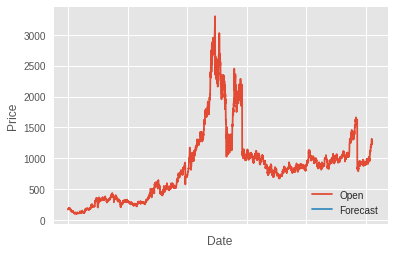

In [65]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

df['Forecast'] = np.nan

last_date = df.iloc[-1].name
#print(last_date)

last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
  next_date = datetime.datetime.fromtimestamp(next_unix)
  next_unix += one_day
  df.loc['next_date'] = [np.nan for _ in range(len(df.columns)-1)] + [i]

df['Open'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
